# IMDB

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.text import *

## Preparing the data

First let's download the dataset we are going to study. The [dataset](http://ai.stanford.edu/~amaas/data/sentiment/) has been curated by Andrew Maas et al. and contains a total of 100,000 reviews on IMDB. 25,000 of them are labelled as positive and negative for training, another 25,000 are labelled for testing (in both cases they are highly polarized). The remaning 50,000 is an additional unlabelled data (but we will find a use for it nonetheless).

We'll begin with a sample we've prepared for you, so that things run quickly before going over the full dataset.

In [4]:
path = Path('/data/toxic/')

It only contains one csv file, let's have a look at it.

In [5]:
df = pd.read_csv(path/'small_train_labeled2.csv')
df.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label
0,0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,NaN,NaN,NaN,NaN,NaN,NaN,okay
1,1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,NaN,NaN,NaN,NaN,NaN,NaN,okay
2,2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",NaN,NaN,NaN,NaN,NaN,NaN,okay
3,3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",NaN,NaN,NaN,NaN,NaN,NaN,okay
4,4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",NaN,NaN,NaN,NaN,NaN,NaN,okay


In [9]:
df[df['label'] != 'okay']['comment_text'].values

array(['COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK',
       'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...',
       "Bye! \n\nDon't look, come or think of comming back! Tosser.",
       "You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I 

size of the dataset and number of samples in each type of comment:

In [27]:
df.shape

(159571, 8)

In [26]:
df.drop(['id','comment_text'],axis=1).sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

a few toxic comments:

In [16]:
df[df['toxic'] == 1].loc[:,'comment_text'].head().values

array(['COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK',
       'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...',
       "Bye! \n\nDon't look, come or think of comming back! Tosser.",
       "You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I 

a few severe toxic comments:

In [18]:
df[df['severe_toxic'] == 1].loc[:,'comment_text'].head().values

array(['COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK',
       'Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!',
       "you are a stupid fuck \n\nand your mother's cunt stinks", 'Hi \n\nIm a fucking bitch.\n\n50.180.208.181',
       'What a motherfucking piece of crap those fuckheads for blocking us!'], dtype=object)

a few obscene comments:

In [17]:
df[df['obscene'] == 1].loc[:,'comment_text'].head().values

array(['COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK',
       "You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!",
       'FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!',
       "GET FUCKED UP. GET FUCKEEED UP.  GOT A DRINK THAT YOU CANT PUT DOWN???/ GET FUCK UP GET FUCKED UP.  I'M FUCKED UP RIGHT NOW!",
       'Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole 

It contains one line per review, with the label ('negative' or 'positive'), the text and a flag to determine if it should be part of the validation set or the training set. If we ignore this flag, we can create a DataBunch containing this data in one line of code:

In [58]:
doc(TextDataBunch.from_csv)

In [31]:
df.head(1)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0


unfortunately can't figure out how to create a multi-class slassifier, so will just create a model to predict toxic comments alone. need to figure out further work with fastai `TextDataBunch` to load multi-class from multiple columns. Otherwise load in pytorch text by itself

In [91]:
labels = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
labels = ['toxic']#,'threat']
data_lm = TextDataBunch.from_csv(path,'train.csv',label_cols=labels)#,classes=labels)

In [92]:
data_lm.show_batch()

text,target
xxbos xxmaj take that ! \n\n xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the,1
xxbos xxup huge xxup faggot xxup huge xxup faggot xxup huge xxup faggot xxup huge xxup faggot xxup huge xxup faggot xxup huge xxup faggot xxup huge xxup faggot xxup huge xxup faggot xxup huge xxup faggot xxup huge xxup faggot xxup huge xxup faggot xxup huge xxup faggot xxup huge xxup faggot xxup huge xxup faggot xxup huge xxup faggot xxup huge xxup faggot xxup huge xxup faggot xxup,1
"xxbos xxmaj you are asshole master of deletions \n 22:18 , 17 xxmaj march 2013 ( diff | hist ) . . ( + xxunk . . xxmaj user talk : patgallacher ‎ ( xxmaj notifying author of deletion nomination for xxmaj patricia xxmaj walsh ) ( current ) \n 22:18 , 17 xxmaj march 2013 ( diff | hist ) . . ( + xxunk . .",1
"xxbos "" \n xxmaj you xxmaj people ... \n ... xxmaj are hoping , begging and wishing for xxunk , respect a title that you did not earn , go by on your own and are not deserving of . xxmaj you did not build the xxup us , you had the xxmaj spanish xxmaj empire and it failed , not you come here by crossing the border and",0
"xxbos "" \n\n xxmaj one xxup mo ' time for the kids in the back ... \n\n xxup just ca n’t let go of a few items , huh ? \n\n xxmaj okay from the top : \n 1 ) xxmaj my info on the xxup glaad awards and the xxup eisner xxmaj nominations came from xxmaj winick ’s website . xxup but is that ’s not good enough",0


In [93]:
data_lm.save('toxic_lm')

Next time we launch this notebook, we can skip the cell above that took a bit of time (and that will take a lot more when you get to the full dataset) and load those results like this:

In [95]:
data = TextDataBunch.load(path,'toxic_lm')

In [97]:
data.show_batch()

text,target
xxbos xxmaj take that ! \n\n xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the,1
"xxbos "" \n\n xxmaj why wikipedia 's mod system does not work ;) \n\n http : / / www.usatoday.com / tech / columnist / xxunk / 2006 - 09 - xxunk - of - xxunk \n\n xxmaj techies hot on concept of ' wisdom of crowds , ' but it has some pitfalls ... \n xxmaj posted 9 / 12 / 2006 xxunk xxup pm xxup et \n\n xxmaj internet",0
"xxbos "" \n\n xxmaj hi xxmaj xxunk - xxmaj the most important thing in any article on a historical person , whether it is for xxmaj wikipedia or an old - fashioned encyclopedia , is accuracy . xxmaj that accuracy goes beyond just the facts and dates that are presented , and goes on to include any photographic images that are purported to be the individual in question . xxmaj",0
"xxbos = = xxmaj please read unblock request carefully \n\n xxmaj this why i ask whoever read my request to read it carefully , i will address your points in order of when your address them . \n\n xxmaj first , your said that you will work with the editor to help make the page notable , yet that is what i was asking for throughout the entire debate before",0
"xxbos "" \n\n xxup you xxup people xxup are xxup at xxup it xxup again . \n\n xxmaj he first started achieving major public notoriety in early 2007 , when he made complaints of harassment at xxmaj columbia xxmaj university , against students who allegedly called him a "" "" baby killer "" "" for being in the military \n\n xxmaj no , he first made his complaints in early",0


### Tokenization

The first step of processing we make texts go through is to split the raw sentences into words, or more exactly tokens. The easiest way to do this would be to split the string on spaces, but we can be smarter:

- we need to take care of punctuation
- some words are contractions of two different words, like isn't or don't
- we may need to clean some parts of our texts, if there's HTML code for instance

To see what the tokenizer had done behind the scenes, let's have a look at a few texts in a batch.

In [120]:
data = TextClasDataBunch.load(path,'toxic_lm')
data.show_batch()

text,target
xxbos xxmaj take that ! \n\n xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the,1
xxbos { { unblock| xxmaj oxymoron is a moron in an xxmaj oxymoron xxmaj oxymoron is a moron in an xxmaj oxymoron xxmaj oxymoron is a moron in an xxmaj oxymoron xxmaj oxymoron is a moron in an xxmaj oxymoron xxmaj oxymoron is a moron in an xxmaj oxymoron xxmaj oxymoron is a moron in an xxmaj oxymoron xxmaj oxymoron is a moron in an xxmaj oxymoron xxmaj oxymoron is,1
"xxbos "" \n xxmaj actually , i do n't think it 's particularly ' enlightening ' at all ! xxmaj first , the essay implies that a person may be inclined to view a number of edits as coming from ' the same person ' . i view that implication as an example of a ' straw - man argument ' : a person builds up an ( intentionally weak",0
"xxbos "" \n\n xxmaj newly xxmaj discovered xxmaj documentary xxmaj evidence xxmaj that xxmaj affects this xxmaj article 's xxmaj accuracy \n\n i have recently found a 1979 booklet of questions and answers with xxmaj rawat printed and distributed by xxmaj divine xxmaj light xxmaj mission , xxmaj inc. which bears heavily on some of the issues central to this article . xxmaj this document was published at least",0
"xxbos "" \n i did n't write the sentence about the biblical references , i merely supplied them . i do n't remember who wrote the sentence . xxmaj however , a federal circuit court , wrote , ( one of my deleted references ) : \n\n xxmaj the following was excerpted from xxmaj xxunk v. xxmaj law , 142 xxmaj xxunk xxunk ( 2d xxmaj cir . 1998 )",0


In [100]:
data.train_ds[2][0]

Text xxbos blocked . xxmaj if i was aware that the conduct i was to have undertaken was to get me permanently blocked form ever edit again i would not have done it i think a warning first would have been good , as i have seen that to be standard practice on other people have looked at who have been

The texts are truncated at 100 tokens for more readability. We can see that it did more than just split on space and punctuation symbols: 
- the "'s" are grouped together in one token
- the contractions are separated like his: "did", "n't"
- content has been cleaned for any HTML symbol and lower cased
- there are several special tokens (all those that begin by xx), to replace unkown tokens (see below) or to introduce different text fields (here we only have one).

### Numericalization

Once we have extracted tokens from our texts, we convert to integers by creating a list of all the words used. We only keep the ones that appear at list twice with a maximum vocabulary size of 60,000 (by default) and replace the ones that don't make the cut by the unknown token `UNK`.

The correspondance from ids tokens is stored in the `vocab` attribute of our datasets, in a dictionary called `itos` (for int to string).

In [101]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.',
 'the']

And if we look at what a what's in our datasets, we'll see the tokenized text as a representation:

In [102]:
data.train_ds[0][0]

Text xxbos xxmaj raking bishops 

 xxmaj the page has good material on several tactical and strategic motifs involving bishops . xxmaj we should probably have a brief discussion of raking bishops , and single and double bishop sacrifices .

But the underlying data is all numbers

In [110]:
data.vocab.itos[8123]

'bishops'

In [103]:
data.train_ds[0][0].data[:10]

array([    2,     4, 38926,  8123,    22,     4,     9,    49,    64,   126])

### With the data block API

We can use the data block API with NLP and have a lot more flexibility than what the default factory methods offer. In the previous example for instance, the data was randomly split between train and validation instead of reading the third column of the csv.

With the data block API though, we have to manually call the tokenize and numericalize steps. This allows more flexibility, and if you're not using the defaults from fastai, the variaous arguments to pass will appear in the step they're revelant, so it'll be more readable.

In [118]:
data = (TextList.from_csv(path, 'small_train.csv', cols='comment_text')
#                 .split_from_df(col=1)
                .no_split()
                .label_from_df(cols=[2])
                .databunch())

In [119]:
data.show_batch()

text,target
"xxbos xxmaj xxunk , xxmaj hello xxmaj witzeman \n\n xxunk \n xxmaj xxunk : ~ | xxunk xxunk xxunk xxunk xxunk xxunk xxunk • xxunk # xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk “ xxunk ” xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk",0
"xxbos "" \n\n xxmaj randroide xxmaj answers to "" "" xxmaj next xxmaj xxunk "" "" \n\n xxmaj guys , i do not see you xxunk xxunk to xxmaj wikipedia : xxmaj xxunk for mediation . \n\n i can not do this job because i always xxunk from "" "" xxunk "" "" xxunk xxunk - access , and following those xxunk could xxunk in new , xxunk ,",0
"xxbos "" = = xxmaj xxunk and xxunk of personalities = = \n xxmaj xxunk . xxmaj your input to xxmaj culture of xxmaj lithuania is xxunk . \n xxmaj some problems of xxunk personalities or xxunk them to certain well - known xxunk systems may xxunk here . i propose a quite xxunk xxunk of it , where definition may not be xxunk with one certain word . xxmaj",0
"xxbos "" \n\n xxup xxunk , you said you wanted to talk \n\n xxmaj at the xxunk of the lead section you have xxunk : \n\n "" "" xxmaj its xxunk xxunk in xxunk that the skyhook concept could be xxunk competitive with what is xxunk thought to be xxunk using a space xxunk , but the skyhook is not competitive with other rotating tether concepts . xxmaj in addition",0
"xxbos "" \n xxmaj fair use rationale for xxmaj image : xxmaj wonju.jpg \n\n xxmaj thanks for xxunk xxmaj image : xxmaj wonju.jpg . i notice the image page xxunk that the image is being used under fair use but there is no explanation or rationale as to why its use in xxmaj wikipedia articles xxunk fair use . xxmaj in addition to the xxunk fair use template , you",0


## Language model

train lm on all text data available (including test.csv) so I will join both train and test together, only keeping the text. 

In [123]:
train_df = pd.read_csv('/data/toxic/train.csv')

In [130]:
train_df.shape

(159571, 8)

In [124]:
test_df = pd.read_csv('/data/toxic/test.csv')

In [131]:
test_df.shape

(153164, 2)

In [128]:
full_lm_text_df = pd.concat([train_df['comment_text'],test_df['comment_text']])

In [132]:
full_lm_text_df.shape

(312735,)

In [133]:
full_lm_text_df.tail()

153159    . \n i totally agree, this stuff is nothing bu...
153160    == Throw from out field to home plate. == \n\n...
153161    " \n\n == Okinotorishima categories == \n\n I ...
153162    " \n\n == ""One of the founding nations of the...
153163    " \n :::Stop already. Your bullshit is not wel...
Name: comment_text, dtype: object

In [134]:
full_lm_text_df.to_csv('/data/toxic/full_lm.csv')

In [136]:
labels = ['toxic']#,'threat']
data_lm = TextDataBunch.from_csv(path,'full_lm.csv')#,classes=labels)

/opt/conda/envs/fastai/lib/python3.6/site-packages/fastai/data_block.py:475: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the folowing unknown labels, the corresponding items have been discarded.
150519, 103439, 157917, 118711, 154274...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [137]:
data_lm.save('toxic_lm')

# Load lm

In [121]:
bs=48

Now let's grab the full dataset for what follows.

In [27]:
path = Path('/data/toxic')

In [138]:
data_lm = TextDataBunch.load(path,'toxic_lm')

The reviews are in a training and test set following an imagenet structure. The only difference is that there is an `unsup` folder on top of `train` and `test` that contains the unlabelled data.

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipeia called [wikitext-103](https://einstein.ai/research/blog/the-wikitext-long-term-dependency-language-modeling-dataset)). That model has been trained to guess what the next word, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviex lefts by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust a little bit the parameters of our model. Plus there might be some words extremely common in that dataset that were barely present in wikipedia, and therefore might no be part of the vocabulary the model was trained on.

This is where the unlabelled data is going to be useful to us, as we can use it to fine-tune our model. Let's create our data object with the data block API (next line takes a few minutes).

In [139]:
len(data_lm.train_ds)

250187

In [141]:
len(data_lm.valid_ds)

48861

We have to use a special kind of `TextDataBunch` for the language model, that ignores the labels (that's why we put 0 everywhere), will shuffle the texts at each epoch before concatenating them all together (only for training, we don't shuffle for the validation set) and will send batches that read that text in order with targets that are the next word in the sentence.

The line before being a bit long, we want to load quickly the final ids by using the following cell.

In [142]:
bs=48

data_lm = TextLMDataBunch.load(path,'toxic_lm',bs=bs)

In [144]:
data_lm.show_batch()

idx,text
0,"xxmaj it is considered vandalism . xxmaj if you would like to experiment , use the sandbox . xxmaj thank you . - xxbos = = xxmaj on edit warring and xxup pov = = \n\n xxmaj someone pointed out this ' edit war ' on my talk page , and i 've been avoiding it . xxmaj but i took a look today and it seems pretty simple"
1,"xxmaj signpost \n { | align=""""center "" "" cellspacing=""""20 "" "" width=90 % style=""""background - color : transparent ; "" "" \n | width=50 % | xxmaj arbitration xxmaj committee elections open \n | width=50 % | xxmaj the xxmaj seigenthaler incident : xxmaj one year later \n |- \n | width=50 % | xxmaj wikimedia celebrates xxmaj commons milestone , plans fundraiser \n | width=50 % | xxmaj wikipedia"
2,"or can you do it as an administrator , so that the history moves with it ? xxmaj there was a revert move xxunk , but i do n't see it anymore . i am trying to create redirects from full names and vice versa , and find missing middle names for people . xxbos : xxmaj hi ! xxmaj many thanks this would be great . i have also"
3,"will be more likely to associate the island with xxmaj europe rather than with xxmaj asia , so this was the reason for sorting the stub templates the way i did . xxmaj originally , we just used for all articles , but the material became so big that we broke it up by continent . i suspect that a stub template for xxmaj middle xxmaj east politicians will eventually"
4,": xxunk \n i have tagged xxmaj image : xxunk as , because it does not provide a fair use rationale . xxmaj if you believe the image to be acceptable for fair use according to xxmaj wikipedia policy , please provide a rationale explaining as much , in accordance with the fair use rationale guideline , on the image description page . xxmaj please also consider using or"


We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in `~/.fastai/models/` (or elsewhere if you specified different paths in your config file).

In [145]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [39]:
# learn = learn.to_fp16()

In [146]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


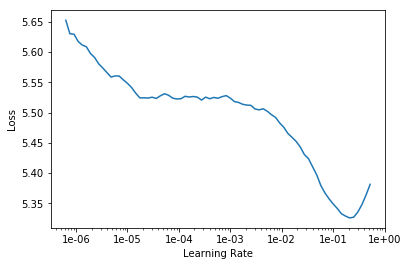

In [147]:
learn.recorder.plot(skip_end=15)

In [148]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.073876,3.899197,0.324654


In [149]:
learn.save('toxic_lm_fit_head')

In [150]:
learn.load('toxic_lm_fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (250187 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /data/toxic
x: LMTextList (250187 items)
[Text xxbos " 

  = = xxmaj racist = = 

  xxmaj this video game is n't just " " pornographic " " it 's racist and depicts xxunk rape . 

  xxmaj also , the word " " xxunk " " should be xxunk , and should really be changed to " " woman " " . ", Text xxbos : xxmaj please do not add nonsense to xxmaj wikipedia . xxmaj it is considered vandalism . xxmaj if you would like to experiment , use the sandbox . xxmaj thank you . -, Text xxbos = = xxmaj on edit warring and xxup pov = = 

  xxmaj someone pointed out this ' edit war ' on my talk page , and i 've been avoiding it . xxmaj but i took a look today and it seems pretty simple , really . xxmaj in certain areas , urban exploration is lumped with xxunk and breaking and entering , thus making it illegal . xxmaj in other areas , it is , what i suppose a

# restart kernel due to memory errors.. reload the learn object

In [4]:
bs=48

data_lm = TextLMDataBunch.load(path,'toxic_lm',bs=bs)

learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [6]:
learn.load('toxic_lm_fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (250187 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /data/toxic
x: LMTextList (250187 items)
[Text xxbos " 

  = = xxmaj racist = = 

  xxmaj this video game is n't just " " pornographic " " it 's racist and depicts xxunk rape . 

  xxmaj also , the word " " xxunk " " should be xxunk , and should really be changed to " " woman " " . ", Text xxbos : xxmaj please do not add nonsense to xxmaj wikipedia . xxmaj it is considered vandalism . xxmaj if you would like to experiment , use the sandbox . xxmaj thank you . -, Text xxbos = = xxmaj on edit warring and xxup pov = = 

  xxmaj someone pointed out this ' edit war ' on my talk page , and i 've been avoiding it . xxmaj but i took a look today and it seems pretty simple , really . xxmaj in certain areas , urban exploration is lumped with xxunk and breaking and entering , thus making it illegal . xxmaj in other areas , it is , what i suppose a

In [7]:
learn.unfreeze()

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


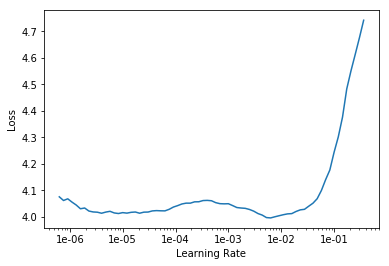

In [9]:
learn.recorder.plot(skip_end=15)

In [10]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.753279,3.635272,0.357043
2,3.583140,3.549110,0.370405
3,3.497261,3.484976,0.379287
4,3.414970,3.444479,0.384658
5,3.380303,3.435067,0.385540


In [11]:
learn.save('toxic_lm_fit_head_finetuned')

After overnight run, save and keep training

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


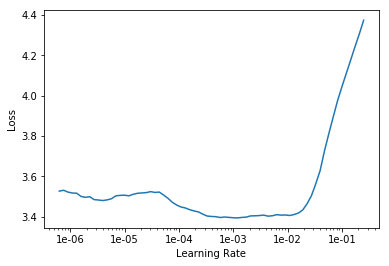

In [13]:
learn.recorder.plot(skip_end=15)

In [6]:
learn.load('toxic_lm_fit_head_finetuned')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (250187 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /data/toxic
x: LMTextList (250187 items)
[Text xxbos " 

  = = xxmaj racist = = 

  xxmaj this video game is n't just " " pornographic " " it 's racist and depicts xxunk rape . 

  xxmaj also , the word " " xxunk " " should be xxunk , and should really be changed to " " woman " " . ", Text xxbos : xxmaj please do not add nonsense to xxmaj wikipedia . xxmaj it is considered vandalism . xxmaj if you would like to experiment , use the sandbox . xxmaj thank you . -, Text xxbos = = xxmaj on edit warring and xxup pov = = 

  xxmaj someone pointed out this ' edit war ' on my talk page , and i 've been avoiding it . xxmaj but i took a look today and it seems pretty simple , really . xxmaj in certain areas , urban exploration is lumped with xxunk and breaking and entering , thus making it illegal . xxmaj in other areas , it is , what i suppose a

In [7]:
learn.fit_one_cycle(5, 1e-4, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.323418,3.435407,0.385552
2,3.300102,3.436674,0.385592
3,3.343982,3.437548,0.385712
4,3.301852,3.438042,0.385734
5,3.362690,3.438035,0.385740


In [8]:
learn.save('toxic_lm_fit_head_finetuned2')

In [44]:
learn

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (22500 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /data/imdb
x: LMTextList (22500 items)
[Text xxbos xxmaj there really are no redeeming factors about this show . xxmaj to put it simply , its just terrible . xxmaj absolutely dreadful . xxmaj it 's just a dreadful " reality " show . xxmaj not only that , it 's dreadful fiction . 

 xxmaj imagine this : a bunch of overly - imaginative teenagers get together one night and go " xxmaj hey ! xxmaj let 's make a paranormal show just like " xxmaj ghost xxmaj hunters " and whatnot ! " xxmaj so they grab a camera , harass local residents and film random landscapes behind a painfully " trying - to - be - dramatic - yet - failing - xxunk " monologue . xxmaj this show is basically a bunch of teenagers running around with a home movie camera trying to make a really bad horror documentary . xxmaj the only difference is this show actually has a budget 

In [75]:
learn.load('fine_tuned');

RuntimeError: Error(s) in loading state_dict for SequentialRNN:
	Missing key(s) in state_dict: "1.layers.0.weight", "1.layers.0.bias", "1.layers.0.running_mean", "1.layers.0.running_var", "1.layers.2.weight", "1.layers.2.bias", "1.layers.4.weight", "1.layers.4.bias", "1.layers.4.running_mean", "1.layers.4.running_var", "1.layers.6.weight", "1.layers.6.bias". 
	Unexpected key(s) in state_dict: "1.decoder.weight", "1.decoder.bias". 

In [10]:
TEXT = "Thats dumb and not at all"
N_WORDS = 40
N_SENTENCES = 2

print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Thats dumb and not at all . xxup lol . xxmaj it 's just true , if the person has been xxup accused of being a xxmaj jew , then the case is just that . xxmaj you should be ashamed of yourself ! xxbos i
Thats dumb and not at all . xxmaj no more xxup than xxup you xxup like xxmaj your xxup bloody xxup school xxup sucks , xxup you xxup suck xxup bastard . xxbos xxup hello xxup my xxup name xxup is xxup the xxup name xxup


In [12]:
TEXT = "What a great point"
N_WORDS = 40
N_SENTENCES = 2

print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

What a great point ! ! ! xxmaj of course , all the information is correct , the page is about the person and you are n't the only one that is taken seriously . xxmaj that 's it . xxmaj the article should
What a great point ! " xxbos xxmaj the xxmaj love xxmaj of xxmaj the xxmaj love ? 

 xxmaj we were the only ones who thought the xxmaj love xxmaj song band was the best and the best side that xxmaj crazy xxmaj


error I got after running the whole thing on to_fp16()

    ---------------------------------------------------------------------------
    RuntimeError                              Traceback (most recent call last)
    <ipython-input-56-135dd315cd3b> in <module>
    ----> 1 print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

    <ipython-input-56-135dd315cd3b> in <genexpr>(.0)
    ----> 1 print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

    /opt/conda/envs/fastai/lib/python3.6/site-packages/fastai/text/learner.py in predict(self, text, n_words, no_unk, temperature, min_p)
        100             if min_p is not None: res[res < min_p] = 0.
        101             if temperature != 1.: res.pow_(1 / temperature)
    --> 102             idx = torch.multinomial(res, 1).item()
        103             text += f' {self.data.vocab.itos[idx]}'
        104         return text

    RuntimeError: invalid argument 2: invalid multinomial distribution (encountering probability entry < 0) at /opt/conda/conda-bld/pytorch_1544174967633/work/aten/src/TH/generic/THTensorRandom.cpp:298

We have to save the model but also it's encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.

In [11]:
learn.save_encoder('toxic_lm_finetuned_enc')

## Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [50]:
path = Path('/data/toxic')

In [51]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('toxic_mc')

In [52]:
bs = 48

In [53]:
data_clas = TextClasDataBunch.load(path, 'toxic_mc', bs=bs)

In [54]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj heavy - handed xxunk . xxmaj writers using characters as xxunk to speak for themselves . xxmaj predictable , plodding plot points ( say that five times fast ) . a child 's imitation of xxmaj britney xxmaj spears . xxmaj this film has all the earmarks of a xxmaj lifetime xxmaj special reject . \n\n i honestly believe that xxmaj jesus xxmaj xxunk and xxmaj julia xxmaj",neg
"xxbos xxmaj god ! xxmaj zorro has been the the subject of about as many movies as xxmaj tarzan , and probably had about as many actors in the title role . \n\n xxmaj this xxmaj serial is one of my own personal favourites , and as previously stated , it is one of the xxmaj top 5 xxmaj sound xxmaj serials . xxmaj oddly enough , this is one",pos
"xxbos xxmaj first off , let me say that i am a great believer in xxmaj xxunk stuff . i see it as a way to continue a good show long after it has been cancelled . xxmaj star xxmaj trek xxmaj xxunk and xxmaj star xxmaj wars xxmaj revelations are examples of decent efforts . xxmaj so i have a soft - spot for xxunk stuff that means i",neg
"xxbos xxrep 5 * xxup warning , xxup may xxup contain xxup spoilers xxup which xxup will xxup be xxup more xxup entertaining xxup than xxup this xxup tripe . xxrep 4 * \n\n xxmaj heres some good advise to anyone living in the xxup u.k. xxmaj whenever xxmaj channel 5 has an old 80 's comedy on late at night , read a book instead . i am currently",neg


We can then create a model to classify those reviews and load the encoder we saved before.

In [55]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('fine_tuned_test_enc')
learn.freeze()

In [56]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


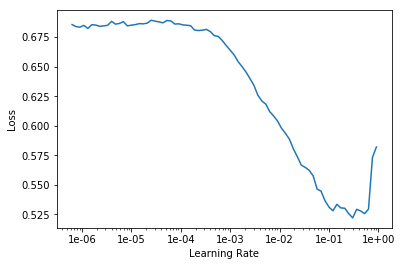

In [57]:
learn.recorder.plot()

In [58]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.409948,0.245562,0.904160


In [59]:
learn.save('fine_tuned_test_cls_1')

In [ ]:
learn.load('fine_tuned_test_cls_1');

In [60]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.308999,0.202802,0.922640


In [61]:
learn.save('fine_tuned_test_cls_2')

In [62]:
learn.load('fine_tuned_test_cls_2');

In [63]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy


RuntimeError: CUDA out of memory. Tried to allocate 51.00 MiB (GPU 0; 5.93 GiB total capacity; 4.73 GiB already allocated; 30.12 MiB free; 345.27 MiB cached)

In [ ]:
learn.save('third')

In [ ]:
learn.load('third');

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.240424,0.155204,0.943160
2,0.217462,0.153421,0.943960


In [ ]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([7.5928e-04, 9.9924e-01]))